# Derivative pricing using a quantum computer

### A (very) brief history

No-arbitrage pricing was first _implicitly_ introduced in the work of Black and Scholes [1], and it was first _explicitly_ used by Merton [2].  Two of those authors, Scholes and Merton, would go on to win the 1997 Nobel Memorial Prize in Economics for this work (Black died two years before the award was given, and the award is not given posthumously).  Although Black, Scholes, and Merton (BSM) first introduced their pricing technology in a continuous time setting, Sharpe, another Nobel laureate (Economics, 1990), was the first to demonstrate the BSM pricing methodology in a discrete-time setting [3], specifically in the so-called *binomial model*.  This model was then formalized by Cox, Ross, and Rubenstein [4].  The binomial model is simple, but the results one can derive within this simple framework, which include the Nobel-worthy result of Black and Scholes, are anything but. In short, to quote Steven Shreve [5]: "The mathematics is simple, but the profound concept of risk-neutral pricing is not".

### Introduction to the binomial option pricing model

### An informal description

In the general one-period binomial model, we call the beginning of the time period _time zero_ and the end of the time period _time one_.  In our simple model we will consider three investible securities: a stock, a bond, and European call option. We discuss these in more detail below.

We begin by defining the price per share of the stock.  To this end, we first introduce a so-called _down factor_ $d>0$ and a so-called _up factor_ $u>d$.  Note that we do not lose generality by adopting the convention that $u>d$.  If we instead had $d>u$, we could simply rename the variables.  We denote by $S_0>0$ the price per share of the stock at time zero, a quantity that is known at time zero.  We denote by $S_1>0$ the price per share of the stock at time one, a quantity that is _not_ known at time zero, but _is_ known at time one.  We assume that all we know about $S_1$ at time zero is that with probability $0<p<1$ it will equal $uS_0$, and with probability $q=1-p$ it will equal $dS_0$.

It is intuitively helpful to imagine that $u>1$ and $d<1$ (even if these inequalities are not necessary for the following discussion to hold).  We can then imagine that we are tossing a coin, labeled $0$ or $1$.  If the outcome of the coin toss is $0$, then the share price will go _down_ from $S_0$ to $dS_0$, and if the outcome of the coin toss is $1$, then the share price will go _up_ from $S_0$ to $uS_0$.  Note that the coin need not be fair, i.e. $p\neq q$ in general.  However, we _have_ assumed that both $p$ and $q$ are strictly greater than zero.  If one of them were zero, then the price per share at time one is in fact not really random, and the model is uninteresting.  Similarly, recall that we have assumed that $u\neq d$.  If we had $u=d$, then again the price per share at time one is in fact not really random, and the model is uninteresting.  This will become more clear later.

We now define the price per share of money market account.  To this end, we first introduce an _interest_ _rate_ $r>-1$.  We will denote by $M_0>0$ the price per share at time zero of the money market account.  At time one, the price per share will be given by $M_1=(1+r)M_0$.  If we again imagine that we are tossing a coin, observe that the price per share at time one does not depend on the outcome of the coin toss, i.e., the price per share at time one is not really random.  Because the price per share of the money market account is not really random, it is sometimes called the _risk-free_ asset, in contrast to the truly random price per share of the stock that we defined in the previous paragraph, sometimes called the _risky_ asset.

Let us now consider a so-called *European Call option*.  This is a contract which gives the owner the right, but not the obligation, to buy a share of the stock at time one for a pre-determined price, $K$, called the *strike price*.  Observe that it only makes sense to exercise the contract when $S_1>K$. In such a situation, the owner can purcahse a share of the stock for $K$, immediately sell for $S_1$, and make a profit of $S_1-K$.  If on the other hand $S_1\leq K$, then there is no benefit in exercising the contract, and it is best to let it expire unexercised. In short, we see that the price at time one of the European call option is given by $V_1:=(S_1-K)^+:=\max\{0, S_1-K\}$. 

Note that the contract is most "interesting" when there is both a non-zero probability that $S_1>K$ _and_ a non-zero probability that $S_1<K$.  If, for example, it is always the case that $S_1>K$, then in fact $V_1=S_1-K$.  Similarly, if it is always the case that $S_1<K$, then in fact $V_1=0$.  In what follows, we therefore assume that both the probability that $S_1>K$ and the probability that $S_1<K$ are non-zero.  Because $S_1$ is either $dS_0$ or $uS_0$, this is equivalent to assuming that $dS_0<K<uS_0$. This ensures that $V_1$ is "genuinely" equal to $(S_1-K)^+$.

We have just determined the price $V_1$ of the European Call option at time one. A natural follow-up question is to determine what the price $V_0$ of such a contract should be at time zero.  **Indeed, the fundamental question of option pricing is to determine what $V_0$ should be**. This is by no means an easy question to answer.  For some perspective, we recall that no widely accepted answer to this question existed until the Nobel Prize-winning work of Black, Scholes, and Merton [1,2].  Intuitively, part of the difficulty in assigning a "sensible" price to such a contract at time zero is that we not know at time zero whether the stock will go up or down at time one. In turn we do not know at time zero whether our contract will confer to us a payoff of $0$ or $S_1-K$ at time one.  Before we proceed to answer this question, we first rephrase this discussion in precise mathematical language.

In [1]:
import matplotlib.pyplot as plt

Text(0.4, 0.23, 'probability $q=1-p$')

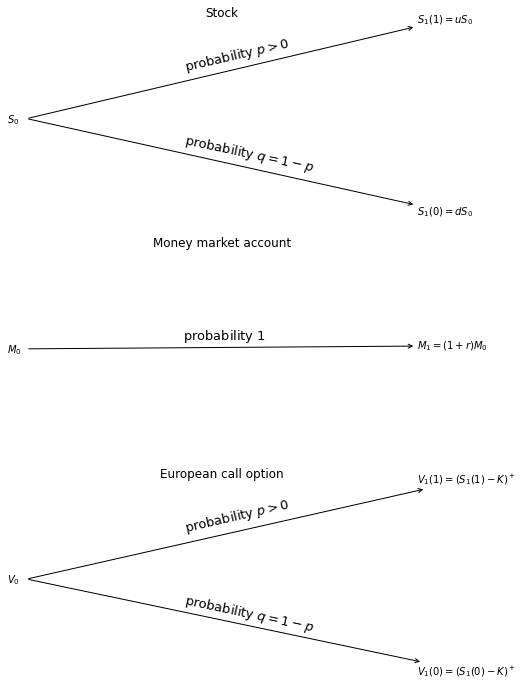

In [2]:
# General one-period binomial model
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7,12))

# Stock price path
ax[0].axis("off")
ax[0].set_title("Stock", ha='center')
ax[0].annotate(text=r'$S_0$',
                  xy=(0, 0.5),
                  xytext=(-0.05, 0.48))
ax[0].annotate(text=r'$S_1(0)=dS_0$',
                  xy=(0, 0.5),
                  xytext=(1, 0),
                  arrowprops=dict(arrowstyle="<-"))
ax[0].annotate(text=r'$S_1(1)=uS_0$',
                  xy=(0, 0.5),
                  xytext=(1, 1),
                  arrowprops=dict(arrowstyle="<-"))
ax[0].text(x=0.4,
           y=0.75,
           s="probability" + r" $p>0$",
           rotation=13,
           size=13)
ax[0].text(x=0.4,
           y=0.23,
           s="probability" + r" $q=1-p$",
           rotation=-12,
           size=13)

# Money market account price path
ax[1].axis("off")
ax[1].set_title("Money market account", ha='center')
ax[1].annotate(text=r'$M_0$',
                  xy=(0, 0.5),
                  xytext=(-0.05, 0.48))
ax[1].annotate(text=r'$M_1=(1+r)M_0$',
                  xy=(0, 0.5),
                  xytext=(1, 0.5),
                  arrowprops=dict(arrowstyle="<-"))
ax[1].text(x=0.4,
           y=0.55,
           s="probability" + r" $1$",
           size=13)

# Derivative price path
ax[2].axis("off")
ax[2].set_title("European call option", ha='center')
ax[2].annotate(text=r'$V_0$',
                  xy=(0, 0.5),
                  xytext=(-0.05, 0.48))
ax[2].annotate(text=r'$V_1(0)=(S_1(0)-K)^+$',
                  xy=(0, 0.5),
                  xytext=(1, 0),
                  arrowprops=dict(arrowstyle="<-"))
ax[2].annotate(text=r'$V_1(1)=(S_1(1)-K)^+$',
                  xy=(0, 0.5),
                  xytext=(1, 1),
                  arrowprops=dict(arrowstyle="<-"))
ax[2].text(x=0.4,
           y=0.75,
           s="probability" + r" $p>0$",
           rotation=13,
           size=13)
ax[2].text(x=0.4,
           y=0.23,
           s="probability" + r" $q=1-p$",
           rotation=-12,
           size=13)


### A more formal description of the model

In this section we define the _random variables_ that we use to model the prices of the assets we introduced in the previous section. 

To that end,  we start by defining a probability space $(\Omega,\mathcal{F},\mathbb{P})$, where
\begin{gather}
\Omega=\{0,1\},\\
\mathcal{F}=\{\emptyset, \{0\}, \{1\}, \Omega\}, \tag{1}\\
1=\mathbb{P}(\Omega)=\mathbb{P}(\{0\})+\mathbb{P}(\{1\}).
\end{gather}
For this probability space not to be trivial, we must assume that both $\mathbb{P}(\{0\})$ and $\mathbb{P}(\{1\})$ be positive, i.e.
\begin{equation}\tag{2}
\mathbb{P}(\{0\})>0 \quad \text{and} \quad \mathbb{P}(\{1\})>0,
\end{equation}
a condition we assume holds throughout this notebook.

The stock price at time zero $S_0$ is then simply some positive real number
\begin{equation}\tag{3}
S_0>0,
\end{equation}
and the stock price at time one $S_1$ is the random variable given by
\begin{gather}
S_1:\Omega\rightarrow\mathbb{R},\\
S_1(0)=dS_0, \tag{4}\\
S_1(1)=uS_0,
\end{gather}
where $u$ is the so-called *up* factor, $d$ is the so-called down factor, and we adopt the convention
\begin{equation}\tag{5}
u>d.
\end{equation}

The price per share of the money market account is in fact not really random, and we simply have
\begin{equation}\tag{6}
M_0=1,
\end{equation}
and
\begin{equation}\tag{7}
M_1=(1+r)M_0=1+r,
\end{equation}
where $r$ is the so-called *interest rate*, and is some number greater than $-1$, i.e.
\begin{equation}\tag{8}
r>-1.
\end{equation}

The last asset price process to define is $V_1$, the price at time one of the European call option with strike price $K$.  This will be defined by
\begin{equation}\tag{9}
\begin{gathered}
V_1:\Omega\rightarrow\mathbb{R},\\
V_1(\omega)=(S_1(\omega)-K)^{+}.
\end{gathered}
\end{equation}

### The fundamental question of option pricing

The fundamental question of option pricing is how much the option should be worth at time zero, i.e.
\begin{gather}
\boxed{V_0 = ?}
\end{gather}

### The no-arbitrage axiom

To answer this question, Black and Scholes [1] began with the following assumption.
>*If options are correctly priced in the market, it should not be possible
to make sure profits by creating portfolios of long and short positions
in options and their underlying stocks*.

Another word for "sure profits" is an *arbitrage*.  Before we define an arbitrage, we first define a *portfolio price process*.  Informally, a portfolio pricess process is simply an investment strategy.  For a formal defintion, we need a bit of additional notation, first. To that end, let $X_0\in\mathbb{R}$ be some real number.  We think of $X_0$ as being the initial capital of some investor (this number can be either negative, zero, or positive).  Now suppose that at time zero the investor buy $\Delta_0\in\mathbb{R}$ shares of the stock and invests the remaining $X_0-\Delta_0S_0$ in the money market account.  Then, at time one the investor will have capital equal to $X_1=\Delta_0S_1+(1+r)(X_0-\Delta_0S_0)$.  In summary, we have
\begin{equation}\tag{10}
X_0\in\mathbb{R},
\end{equation}
and
\begin{equation}\tag{11}
\begin{gathered}
X_1:\Omega\rightarrow\mathbb{R},\\
X_1(\omega)=\Delta_0S_1(\omega)+(1+r)(X_0-\Delta_0S_0).
\end{gathered}
\end{equation}
We call any stochastic process obeying Equations (10) and (11) a *portfolio price process*.

Having defined a portfolio pricess process, we can now define an arbitrage.  Informally, an arbitrage is any investment strategy that begins with zero capital, has zero probability of losing money, and positive probability of making money.  In other words, an arbitrage is a portfolio pricess process $X_0,X_1$ that satisfies
\begin{equation}\tag{12}
\begin{gathered}
X_0=0,\\
\mathbb{P}(\{\omega\in\Omega:X_{1}(\omega)<0\})=0,\\
\mathbb{P}(\{\omega\in\Omega:X_{1}(\omega)>0\})>0.
\end{gathered}
\end{equation}

As it turns out, one can show that our simple market model does not admit an arbitrage if two conditions hold.  The first is that
\begin{equation}\tag{13}
d<1+r<u.
\end{equation}
The proof of this is not difficult, and one can intuitively understand this condition as follows: if the stock can grow by more than the money market, then it can also lose more money than the money market. Suppose this were not the case. Suppose, for example, that the stock could not grow by more than the money market, an equivalent way of saying that $1+r\geq u>d$. Because the returns of the stock would never be superior to the returns of the money market, one could create an arbitrage by shorting the stock and investing the proceeds in the money market.  One can similarly create an arbitrage if instead it were the case that stock could never lose more money than the money market, an equivalent way of saying that $1+r\leq d<u$.  For a more in-depth discussion of this fact, we refer the interested reader to the discussion around Equation (1.1.2) in [5].

### No-arbitrage pricing

What is the second condition that needs to hold for our market model to preclude an arbitrage?  This question takes us immediately back to the question of determining $V_0$.

To set the stage, suppose that it were possible to replicate the payoff $V_1(\omega)$ starting with some yet to be determined initial capital $X_0$, and appropriately investing in the stock and money market account so as to have $X_1(\omega)=V_1(\omega)$, for _all_ $\omega\in\Omega$.  In other words, we want to invest in the stock and money market accounts such that regardless of the "coin tossing", our investment strategy exactly yields the payoff of the European Call option.  If this is possible, we will see that if we want our model to preclude arbitrage, it necessary that $V_0=X_0$. To see why this is the case, suppose for example that instead it were the case that $V_0<X_0$. Then, starting with initial capital $Y_0=0$, one could sell a share of the porfolio for $X_0$, use the proceeds to buy a contract worth $V_0$, and invest the remaining $X_0-V_0>0$ in the money market account. At time one we would have capital
\begin{equation}\tag{14}
Y_1(\omega)=\underbrace{(V_1(\omega)-X_1(\omega))}_{=0}+(1+r)\underbrace{(X_0-V_0)}_{>0}>0.
\end{equation}
In other words, independent of $\omega$ (i.e. "the outcome of the coin toss"), we have that $Y_1(\omega)>0$.  We could similarly find a different arbitrage if instead we had $V_0>X_0$.  As we shall soon see, it _is_ in fact possible to replicate the payoff $V_1(\omega)$ with the appropriate initial capital $X_0$ and appropriate investment allocations to the stock and money market account.  We now show this in detail.

### Replicating the option

Suppose we begin with some yet to be determined initial capital $X_0$ . At time zero we purchase some yet to be determined quantity $\Delta_0$ shares of the stock, and invest the remaing capital $X_0-\Delta_0S_0$ in the money market account. Then, at time one we will have capital $X_1(\omega)=\Delta_0S_1(\omega)+(1+r)(X_0-\Delta_0S_0)$. In short, $X_0,X_1$ is a portfolio pricess process as defined by Equations (10) and (11).

Recall that our aim is to replicate the option.  In other words, we want to choose $X_0$ and $\Delta_0$ so that $X_1(\omega)=V_1(\omega)$ for _all_ $\omega\in\Omega$.  This leads to the following system of two linear equations in two unknowns:
\begin{equation}\tag{15}
\begin{split}
\omega=0:\quad X_1(0)&=\Delta_0S_1(0)+(1+r)(X_0-\Delta_0S_0)=V_1(0),\\
\omega=1:\quad X_1(1)&=\Delta_0S_1(1)+(1+r)(X_0-\Delta_0S_0)=V_1(1).
\end{split}
\end{equation}

One can verify that the solution to this system of linear equations is given by
\begin{equation}\tag{16}
\Delta_0=\frac{V_1(1)-V_1(0)}{S_1(1)-S_1(0)},
\end{equation}
and
\begin{equation}\tag{17}
X_0=\frac{1}{1+r}\left[\tilde{q}V_1(0)+\tilde{p}V_1(1)\right],
\end{equation}
where
\begin{equation}\tag{18}
\begin{split}
\tilde{q}&=\frac{u-1-r}{u-d},\\
\tilde{p}&=\frac{1+r-d}{u-d}.
\end{split}
\end{equation}

### The time-zero price of the option

But recall that we must have $V_0=X_0$ if there is to be no arbitrage, and hence we arrive at the *no-arbitrage price* at time zero of the European Call option:
\begin{equation}\tag{19}
V_0=\frac{1}{1+r}\left[\tilde{q}V_1(0)+\tilde{p}V_1(1)\right],
\end{equation}
with $\tilde{p}, \tilde{q}$ given by Equation (18).

### Interpretation of $\tilde{p}, \tilde{q}$

On the surface, it might appear as though $\tilde{p}$ and $\tilde{q}$ are merely aribtrary variables we've defined so as to make the equations above hold.  In fact, there is a much deeper interpretation to these seemingly benign variables.  First, observe that
\begin{equation}\tag{20}
\tilde{q}+\tilde{p}=+\frac{u-1-r}{u-d}+\frac{1+r-d}{u-d}=1.
\end{equation}
Furthermore, Equation (13) implies that both $\tilde{q}$ and $\tilde{p}$ are strictly positive, i.e.
\begin{equation}\tag{21}
\tilde{q}, \tilde{p}>0.
\end{equation}
Equations (20) and (21) together suggest that the expression $\tilde{q}V_1(0)+\tilde{p}V_1(1)$ can be interpreted as an expectation value.  Specifically, let $\tilde{\mathbb{P}}$ be the probability measure on $\mathcal{F}$ (recall Equation (1) for the definition of $\mathcal{F}$) defined by
\begin{equation}\tag{22}
\begin{split}
\tilde{\mathbb{P}}(\{0\})=\tilde{q},\\
\tilde{\mathbb{P}}(\{1\})=\tilde{p}.
\end{split}
\end{equation}

### The risk-neutral pricing formula

Then we can write
\begin{equation}
\tilde{q}V_1(0)+\tilde{p}V_1(1)=\tilde{\mathbb{P}}(\{0\})V_1(0)+\tilde{\mathbb{P}}(\{1\})V_1(1)=\tilde{\mathbb{E}}[V_1],
\end{equation}
and we can rewrite the expression for $V_0$ as
\begin{equation}\tag{23}
\boxed{V_0=\frac{1}{1+r}\tilde{\mathbb{E}}[V_1]}.
\end{equation}
Written in this form, i.e. in terms of the expectation value under an appropriate probability measure, Equation (24) is known as the *risk-neutral price* at time zero of the European Call option.

### Concluding remarks

In our simple market model, it might seem like overkill to have gone through the lengths of defining an entirely new probability measure $\tilde{\mathbb{P}}$ _after_ we had already solved the problem we had initially set out to solve, namely that of determining a "reasonable price" $V_0$ of the European call option at time zero.  In other words, it is natural to wonder why we bothered to go through the work to rewrite Equation (19) as Equation (23), given that they contain the same content.  While that may be the case here, *in general* the very closely-linked concepts of no-arbitrage pricing and risk-neutral pricing are not quite the same thing.  The so-called *first* and *second fundamental theorems of asset pricing* establish a profound connection between these two different concepts.  Before we elaborate on this, it is helpful to first make a few additional observations about the probability measure $\tilde{\mathbb{P}}$.

The probability measure $\tilde{\mathbb{P}}$ we just constructed is called a *risk-neutral* measure.  The name *risk-neutral* can be attributed to the fact that, if this were the real probability measure, then the stock and the money market account would have the same mean rate of return.  To see this, observe that
\begin{equation}\tag{24}
\begin{split}
\tilde{\mathbb{E}}S_1&=\tilde{\mathbb{P}}(\{1\})S_1(1)+\tilde{\mathbb{P}}(\{0\})S_1(0)\\
&=\frac{1+r-d}{u-d}uS_0+\frac{u-1-r}{u-d}dS_0\\
&=(1+r)S_0.
\end{split}
\end{equation}
Of course, the stock would still be *riskier* that money market account in the sense that it would still have a greater volatility (recall that the volatility of the money market account is in fact zero).  In other words, if this were the real probability measure, there would be two assets with the same mean rate of return, but different volatilities.  This can only happen if investors require no compensation for risk, i.e., if they are *risk-neutral*.  In reality this is not the case, and so the risk-neutral probability measure $\tilde{\mathbb{P}}$ should not be confused with the real probability measure $\mathbb{P}$.  Nevertheless, risk-neutral pricing approach 

We finish this section by stating the first and second fundamental theorems of assets pricing, which establish a profound connection between risk-neutral measures, hedging, and arbitrage. We write these two theorems as they are stated in [6]:

>**First fundamental theorem of asset pricing**. If a market model has a risk-neutral probability measure, then it does not admit arbitrage.

>**Second fundamental theorem of asset pricing**.  Consider a market model that has a risk-neutral probability measure. The model is complete [i.e. every derivative security can be hedged] if and only if the risk-neutral probability measure is unique.

### Derivative pricing on a quantum computer

In this section we adress why the discussion above is relevant in quantum computing.  To that end, we begin by recalling Equation (23).  In particular, note that we are able to write the price at time zero of the derivative security as the (discounted) risk-neutral  expectation value (i.e. the expectation value using the risk-neutral probability measure) of the payoff of that derivative security at time one. As it turns out, it is often the case in many more realistic market models that the appropriate price of a derivative security in that market model can be expressed as the (discounted) risk-neutral expectation value of the payoff of that derivative security at some future time.  A justification of this claim is well beyond the scope of this educational notebook, but for a more detailed treatment on the topic, we recommend the textbook [5] as a gentle introduction, and then textbook [6] which treats the same material (and more) but in a much more sophisticated mathematical setting.

In short, it is often the case that a critical part of derivative pricing involves the evaluation of some expectation value. In our simple market model, this was exceedingly simple to do by hand. However, it is not too difficult to imagine that this task may become much more challenging as we consider more realistic market models and derivative products. In practice, therefore, one often turns to Monte Carlo methods to obtain estimates of the expectation values which are too difficult to compute analytically. In [7], Montanaro describes a quantum algorithm which can accelerate Monte Carlo methods in a very general setting.  More specifically, the algorithm provably achieves a near-quadratic speedup over the best possible classical algorithm.  This makes derivative pricing a good candidate application to benefit from quantum computing.  Indeed, in [8], Robentrost et al show how one can apply the result from [7] to derivative pricing.

In the remainder of this notebook, the goal is to show, in detail, how one can use the algorithm in [8] to price a very simple derivative, namely, a European Call option in a one period binomial model.  Our example will be sufficiently simple that it can be calculated by hand.  This will then allow us to compare the results of our quantum algorithm with the analytical result.

### Brief overview of the algorithm

Before we proceed with our own example, it first helps to understand the algorithm *in general*.  Roughly speaking, the algorithm consists of three steps.  Before we describe these three steps in detail, let us draw a circuit corresponding to the algorithm.  We can then reference the different parts of the drawing when we explain the algorithm in detail.

In [3]:
# import numpy
import numpy as np

# import the necessary parts of Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble, Aer, IBMQ, execute
from qiskit.circuit import Gate
from qiskit.circuit.library import QFT

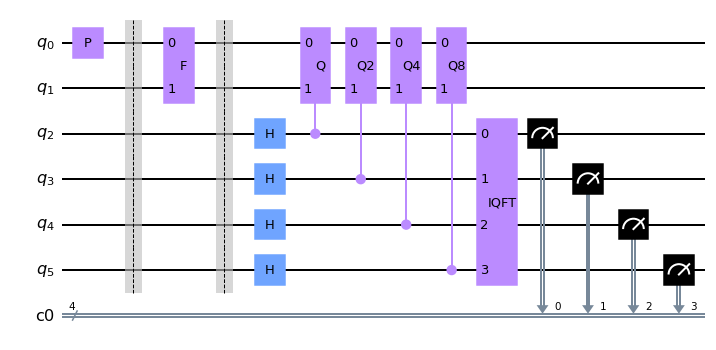

In [4]:
'''The circuit below doesn't really do anything useful :-)
We don't care about that right now.
For now, we are literally only interested in _drawing_ a circuit that
corresponds to the algorithm we are interested in. We just want a
a drawing that will make things easier to explain.
In order to avoid confusiong, it is therefore strongly advised that you
ignore the code below, and merely pay attention to the _drawing_ output
at the end.'''

# Prepares probability distribution
P = Gate(name='P', num_qubits=1, params=[], label=None)

# Preapres payoff function corresponding to derivative
F = Gate(name='F', num_qubits=2, params=[], label=None)

# Prepares unitary for PEA
reg = QuantumRegister(2)
circ = QuantumCircuit(reg, name='Q')
# This next line is arbitrary
# Any 2-qubit gate will do
circ.cx(reg[0], reg[1])
Q = circ.to_gate()
Q.name = 'Q'
cQ = Q.control(1)
Q.name = 'Q2'
cQ2 = Q.control(1)
Q.name = 'Q4'
cQ4 = Q.control(1)
Q.name = 'Q8'
cQ8 = Q.control(1)

# Create final circuit
reg = QuantumRegister(6, name='q')
creg = ClassicalRegister(4)
circ = QuantumCircuit(reg, creg, name='Q')

# Stage 1
# Prepare probability distribution
circ.append(P, (reg[0],))
circ.barrier()

# Stage 2
# Prepare derivative payoff
circ.append(F, (reg[0], reg[1]))
circ.barrier()

# Stage 3
# PEA
circ.h(reg[2])
circ.h(reg[3])
circ.h(reg[4])
circ.h(reg[5])
circ.append(cQ, (reg[2], reg[0], reg[1]))
circ.append(cQ2, (reg[3], reg[0], reg[1]))
circ.append(cQ4, (reg[4], reg[0], reg[1]))
circ.append(cQ8, (reg[5], reg[0], reg[1]))
circ.append(QFT(num_qubits=4, inverse=True), [reg[i+2] for i in range(4)])
circ.measure(reg[2], creg[0])
circ.measure(reg[3], creg[1])
circ.measure(reg[4], creg[2])
circ.measure(reg[5], creg[3])
circ.draw("mpl")

Using the drawing above as a guide, we now describe how the algorithm works.  As mentioned earlier, the algorithm consists of three steps.  In the drawing you can see each of the three different steps being separated by a $\texttt{barrier}$ (the semi-transparent gray vertical lines each with a black dashed line running down their middle).

### Step 1 - Encoding the probabilities

In Step 1 we want to encode the appropriate probabilities into the probability amplitudes.  This is easiest to understand when the probability space $(\Omega, \mathcal{F}, \tilde{\mathbb{P}})$ is finite.  To that end, in the discussion that follows, we assume that this probability space is of the form
\begin{equation}\tag{25}
\begin{gathered}
\Omega=\{0,1\}^n,\\
\mathcal{F}=\mathcal{P}(\Omega),\\
\tilde{\mathbb{P}}:\mathcal{F}\rightarrow[0,1],
\end{gathered}
\end{equation}
where $\tilde{\mathbb{P}}$ is a probability measure.  The goal, then, is to apply the operation
\begin{equation}\tag{26}
|0^{n}\rangle\rightarrow\sum_{\omega\in\Omega}\sqrt{\tilde{\mathbb{P}}(\{\omega\})}|\omega\rangle.
\end{equation}
We will denote by $P$ any transformation that performs the transformation of Expression (26), i.e.
\begin{equation}\tag{27}
\boxed{P|0^{n}\rangle=\sum_{\omega\in\Omega}\sqrt{\tilde{\mathbb{P}}(\{\omega\})}|\omega\rangle}.
\end{equation}

### A remark about Step 1

Of course, it may be that we are interested in a probability space that is not of the form defined by Equation (25).  In fact, this is often the case.  For example, it is often the case that we are interested in probabilities coming from a normal distribution, e.g. $\Omega=\mathbb{R}, \mathcal{F}=\mathcal{B}(\mathbb{R})$ (here $\mathcal{B}(\mathbb{R})$ denotes the Borel $\sigma$-algebra on $\mathbb{R}$), and for some  $\mu\in\mathbb{R}, \sigma>0$ and all $a<b\in\mathbb{R}$ the probability measure $\mathbb{P}$ satisfies
\begin{equation}
\mathbb{P}([a,b])=\int_{a}^{b}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}dx, \quad \text{for all } a<b.
\end{equation}
In these situations, one can approximate the probability distribution $\mathbb{P}$ with some other probability distribution $\hat{\mathbb{P}}$ that is of the form specified by Equation (25).  There are many ways of doing this.  As an example, let us consider the case when the probability measure $\mathbb{P}$ is such that there is a corresponding probability density $\varphi(x)$.  Then one simple way of doing this is as follows.  First, choose a grid of points $x_0<\dots<x_{M}$, where $M=2^m$ for some integer $m$, and instead using the probability space
\begin{equation}
\begin{gathered}
\hat{\Omega}=\{0,1\}^m,\\
\hat{\mathcal{F}}=\mathcal{C}(\hat{\Omega}),\\
\hat{\mathbb{P}}(\{\text{bin}(i)\})=\frac{1}{C}\int_{x_i}^{x_{i+1}}\varphi(x)dx \quad \text{for all } i\in\{0,\dots,M-1\},
\end{gathered}
\end{equation}
where the normalization factor $C$ is given by $C=\sum_{i=0}^{M-1}\int_{x_i}^{x_{i+1}}\varphi(x)dx$, and bin($i$) is an appropriate binary representation of $i$.  The question of how to "best" choose such an approximation in general is non-trivial, and in this notebook we assume Equations (25) hold.

### Step 2 - The payoff function

In Step 2 we wish to encode the payoff of the derivative security. Specifically, let $f$ be the random variable corresponding to the derivative security, i.e.
\begin{equation}\tag{28}
f:\Omega\rightarrow\mathbb{R}.
\end{equation}
Then we want to perform the operation
\begin{equation}\tag{29}
|0\rangle|\omega\rangle\rightarrow\left(\sqrt{1-f(\omega)}|0\rangle+\sqrt{f(\omega)}|1\rangle\right)|\omega\rangle.
\end{equation}
We will denote by $F$ any transformation that performs the transformation in Expression (29), i.e.
\begin{equation}\tag{30}
\boxed{F|0\rangle|\omega\rangle=\left(\sqrt{1-f(\omega)}|0\rangle+\sqrt{f(\omega)}|1\rangle\right)|\omega\rangle}.
\end{equation}
Note that the equation above only makes sense if $0\leq |f(\omega)|^2\leq 1$.  One simple way of guaranteeing this is if
\begin{equation}\tag{31}
f(\omega)\in[0,1] \quad \text{for all } \omega\in\mathbb{\Omega},
\end{equation}
a condition we assume holds in this notebook.  When this is not the case, note that we can instead work with the function $g$ defined by
\begin{equation}\tag{32}
\begin{gathered}
g:\Omega\rightarrow[0,1],\\
g(\omega):=\frac{1}{\max_{\omega\in\Omega}f(\omega)-\min_{\omega\in\Omega}f(\omega)}\left(f(\omega)-\min_{\omega\in\Omega}f(\omega)\right).
\end{gathered}
\end{equation}


### A summary of Steps 1 and 2

Before we proceed to Step 3, we make the following observation about Steps 1 and 2 which will help us gain some intuition about what we have accomplished so far.  The observation is that there is a way to extract the desired expectation value, i.e. $\tilde{\mathbb{E}}f$, by performing the appropriate measurement after Steps 1 and 2.  We now describe this in detail.

We begin by introducing the shorthand notation $L=F(I_2\otimes P)$, where $I_2$ is identity operator in $2$ dimensions, so that
\begin{equation}\tag{33}
\begin{split}
L|0\rangle|0^{n}\rangle&=F(I_2\otimes P)|0\rangle|0^{n}\rangle\\
&=\sum_{\omega\in\Omega}\left(\sqrt{1-f(\omega)}|0\rangle+\sqrt{f(\omega)}|1\rangle\right)\sqrt{\tilde{\mathbb{P}}(\omega)}|\omega\rangle\\
&:=|u\rangle.
\end{split}
\end{equation}

Let $\mu$ be the probability that the first qubit is found to be in the sate $|1\rangle$ if our quantum computer is in the state $|u\rangle$ and we perform the appropriate projective measurement.  In other words,
\begin{equation}\tag{34}
\mu:=\langle u|(|1\rangle\langle 1|\otimes I_{2^n})|u\rangle,
\end{equation}
where $I_{2^n}$ denotes the identity operator on $n$ qubits.  If we simplify this expression, we obtain
\begin{equation}\tag{35}
\begin{split}
\mu&=\langle u|(|1\rangle\langle 1|\otimes I_{2^n})|u\rangle\\
&=\sum_{\omega\in\Omega}\tilde{\mathbb{P}}(\{\omega\})f(\omega)\\
&=\tilde{\mathbb{E}}[f].
\end{split}
\end{equation}
This is precisely the quantity we set out to measure!  Of course, we are not quite done.  Ineed, let us observe  how one would experimentally extract the desired expectation value.

Suppose one repeats the projective measurement $t$ times, counting the times the first qubit is found in the $|1\rangle$ state, and diving that by $t$.  In other words, for each trial $i\in\{1,\dots,t\}$, let $\mathbb{1}^i_{|1\rangle}$ be the random variable which is equal to $1$ if the first qubit is found in the $|1\rangle$ state, and $0$ otherwise.  Then the experimental procedure we just described amounts to taking realizations of the random variable $\frac{1}{t}\sum_{i=1}^{t}\mathbb{1}^i_{|1\rangle}$, and using that as the estimate $\hat{\mu}$ of $\mu$.  Note that
\begin{align}
\delta^2&:=\text{Var}\left(\frac{1}{t}\sum_{i=1}^{t}\mathbb{1}^i_{|1\rangle}\right)\\
&=\frac{1}{t^2}\sum_{i=1}^{t}\text{Var}\left(\mathbb{1}^i_{|1\rangle}\right)\\
&=\frac{1}{t^2}t\mu(1-\mu)\\
&=\frac{\mu(1-\mu)}{t}.
\end{align}
Hence, the experiment has to be repeated
\begin{equation}
t=O\left(\frac{\mu(1-\mu)}{\delta^2}\right)
\end{equation}
times for a given accuracy $\delta$.  This quadratic dependency in $\delta$ is analogous to the *classical* Monte Carlo dependency. Obtaining a quadratic speedup for the number of repetitions is the core task of the algorithm we descrive in Step 3.

### Step 3 - Phase estimation

In Step 3 we use an an algorithm that is based on the phase estimation algorithm.  This algorithm is easiest to understand if we consider three separate algorithms, each of which make use of the previous algorithm.  The final algorithm is what we will ultimately use.  Therefore, will discuss the final algorithm in detail.  For the interested reader, we given references for a detailed discussion of the first two.

#### PEA 1

We denote by the PEA 1 the standard phase estimation algorithm in its simplest case.  Concretely, suppose that $|u\rangle$ is an eigenstate of the unitary operator $U$ with corresponding eigenvalue $e^{2\pi i\varphi}$. The algorithm produces an estimate $\hat{\varphi}$ of $\varphi$.  The PEA 0 assumes that we can prepare the state $|u\rangle$, and also operations of the form controlled-$U^{2^j}$.  For detailed discussion of the PEA 0, we refer the reader to Section 5.2 in [10].

#### PEA 2

The PEA 2 can be viewed as a sort of extension of the PEA 1.  Suppose that the quantum state $|u\rangle$ is not necessarily an eigenstate of $U$, but rather a linear combination of eigenstates of $U$.  In other words, suppose
\begin{equation}
|u\rangle=\sum_{j=1}^{k}c_j|u_j\rangle,
\end{equation}
where
\begin{equation}
\sum_{j=1}^{k}|c_j|^2=1,
\end{equation}
and for each $j\in \{1,\dots,k\}$ we have
\begin{equation}
U|u_j\rangle=e^{2\pi i\varphi_j}|u_j\rangle.
\end{equation}
Then, with probability $|c_j|^2$, the algorithm produces an estimate $\hat{\varphi_j}$ of $\varphi_j$.  Like the PEA 1, the PEA 2 assumes that we can prepare the state $|u\rangle$, and also operations of the form controlled-$U^{2^j}$.  For a more in-depth discussion, we refer the reader again to Section 5.2 of [10], as well as Exercise 5.8 at the end of Section 5.2.

#### PEA 3

Based on the PEA 1, the PEA 2 can be used to estimate $\langle u|U|u\rangle$ when $U$ is a unitary operator, even when $|u\rangle$ is not necessarily an eigenstate of $U$.  As mentioned earlier, the PEA 3 is ultimately what we will use, so we now describe the PEA 3 in detail.

We begin by recalling that any vector in any $n$-qubit pure state can be written as a linear a combination of $|u\rangle$ and some other $n$-qubit pure state $|u^{\perp}\rangle$ that is orthogonal to $|u\rangle$. In particular, $U|u\rangle$ is an $n$-qubit pure state, which means that we may write
\begin{equation}\tag{36}
U|u\rangle=\cos(\theta/2)|u\rangle+e^{2\pi i\phi}\sin(\theta/2)|u^{\perp}\rangle.
\end{equation}
Note, then, that
\begin{equation}\tag{37}
\langle u|U|u\rangle=\cos(\theta/2)
\end{equation}
Hence, we may estmtae $\langle u|U|u\rangle$ if we can estimate $\theta$. The goal, then, is to design a unitary operator $Q$ that encodes $\theta$ in its eigenvalues and use PEA 1.  While in principal there could be many such operators, there is one that is of particular interest to us.  First we'll define the operator and show that it encodes $\theta$ in its eigenvalues, and then we'll show why it is of interest to us.

The operation $Q$ that we are after is a rotation across $U|u\rangle$, followed by a rotation across $|u\rangle$.  Specifically, let
\begin{equation}\tag{38}
R_{U|u\rangle}:=I_{2^n}-2U|u\rangle\langle u|U^{\dagger}
\end{equation}
be a rotation across $U|u\rangle$, and let
\begin{equation}\tag{39}
R_{|u\rangle}:=I_{2^n}-2|u\rangle\langle u|
\end{equation}
be a rotation across $|u\rangle$.  Then $Q$ is given by
\begin{equation}\tag{40}
Q:=R_{|u\rangle}R_{U|u\rangle}.
\end{equation}
It can be shown that $Q$ has eigenvalues $e^{\pm i\theta}$ and that
\begin{equation}\tag{41}
|u\rangle=\frac{1}{\sqrt{2}}(|u+\rangle+|u-\rangle),
\end{equation}
where $Q|u_{\pm}\rangle=e^{\pm i\theta}$.  Hence, using the PEA 2 for the operator $Q$ with input quantum state $|u\rangle$ will return an estimate $\hat{\varphi}$ of $\varphi$ with probability $|1/\sqrt{2}|^2=1/2$, and an estimate $\hat{-\varphi}$ of $-\varphi$ also with probability $|1/\sqrt{2}|^2=1/2$, where $\theta=2\pi\varphi$, and $-\theta=2\pi(-\varphi)$.  Because $\cos(\theta/2)=\cos((-\theta)/2)$, any of these estimates will suffice.

### The PEA 3 in our case

From the previous section, recall that $\langle u|(|1\rangle\langle 1|\otimes I_{2^n})|u\rangle=\mu$.  Naively, then one might want to use the PEA 2 for the operator $|1\rangle\langle 1|\otimes I_{2^n}$.  The problem, of course, is that this operator is _not_ unitary, which is a requirement for the PEA 2.  One easy fix for this is to instead consider the _unitary_ operator
\begin{equation}
U=I_{2^{n+1}}-2|1\rangle\langle 1|\otimes I_{2^n},
\end{equation}
or, equivalently,
\begin{equation}
U=\sum_{i=1}^{2^n}|0\text{bin}(i)\rangle\langle 0\text{bin}(i)|-\sum_{i=1}^{2^n}|1\text{bin}(i)\rangle\langle 1\text{bin}(i)|.
\end{equation}
From the equation above it is immediate that $U=U^{\dagger}$, and
\begin{equation}
UU^{\dagger}=U^{\dagger}U=UU=\sum_{i=1}^{2^n}|0\text{bin}(i)\rangle\langle 0\text{bin}(i)|+(-1)^2\sum_{i=1}^{2^n}|1\text{bin}(i)\rangle\langle 1\text{bin}(i)|=I_{2^{n+1}}.
\end{equation}
We see, then, that $U$ is indeed unitary.  If now write
\begin{equation}
U|u\rangle=\cos(\theta/2)|u\rangle+e^{2\pi i\phi}\sin(\theta/2)|u^{\perp}\rangle,
\end{equation}
then we can use the PEA 2 to estimate $\theta$, and in turn estimate the expectation value of $\langle u|U|u\rangle$, which is
\begin{equation}
\langle u|U|u\rangle=1-2\mu=1-2\tilde{\mathbb{E}}f.
\end{equation}
We now have all of the ingredients necessary to estimate $\tilde{\mathbb{E}}f$.

# A specific example - problem instance specification

### A specific example

Let us consider a specific example of the binomial model we presented in the previous section.  Specifically, we will work with Example 1.1.1 in [5], a textbook we can't recommend enough enough as an introduction to derivative pricing.  We will summarize the model now.
We begin by specifying the interest rate, $r$:
\begin{equation}
r=\frac{1}{4}.
\end{equation}
Having specified the interest rate, we can now define the money market account.  This will be given by
\begin{equation}
M_0=1,
\end{equation}
and
\begin{equation}
M_1=(1+r)M_0=1+r.
\end{equation}
Next we move on to defining the stock price process.  We start by specifying the up and down factors.  These will be given by
\begin{equation}
u=2,
\end{equation}
and
\begin{equation}
d=\frac{1}{2}.
\end{equation}
Next we must specify the relevant probability space $(\Omega, \mathcal{F}, \tilde{\mathbb{P}})$.  This will be given by
\begin{equation}
\Omega=\{0,1\},
\end{equation}
\begin{equation}
\mathcal{F}=\{\emptyset, \{0\}, \{1\}, \Omega\}.
\end{equation}
From Equations (17) and (13) we have that the risk-neutral probability measure is given by
\begin{equation}
\tilde{\mathbb{P}}(\{0\})=\frac{u-1-r}{u-d}=\frac{1}{2},
\end{equation}
\begin{equation}
\tilde{\mathbb{P}}(\{1\})=\frac{1+r-d}{u-d}=\frac{1}{2}.
\end{equation}
Now we can define the stock price process.  The initial stock price $S_0$ will be
\begin{equation}
S_0=4,
\end{equation}
and and the stock price at time one $S_1$ will be given by
\begin{align}
S_1(1)=uS_0=8,\\
S_1(0)=dS_0=2.
\end{align}
Finally we specify the European Call option which will give the owner the right but not the obligation to purchase one share of the stock at the strike price $K$.  Let the strike price be given by
\begin{equation}
K=5.
\end{equation}
Then
\begin{align}
V_1(1)&=(S_1(1)-K)^+=3,\\
V_1(0)&=(S_1(0)-K)^+=0,
\end{align}
and the risk-neutral pricing formula Equation (18) give us
\begin{equation}
V_0=\frac{1}{1+r}\tilde{\mathbb{E}}V_1=\frac{1}{1+r}(\tilde{\mathbb{P}}(\{0\})V_1(0)+\tilde{\mathbb{P}}(\{1\})V_1(1))=\frac{6}{5}.
\end{equation}
The drawing below summarizes the model.

Finally, we define a *normalized* version of $V_1$.  Specifically, let
\begin{gather}
f:\Omega\rightarrow\mathbb{R},\\
f(\omega):=\frac{1}{\max_{\omega\in\Omega}V_1(\omega)-\min_{\omega\in\Omega}V_1(\omega)}\left(V_1(\omega)-\min_{\omega\in\Omega}V_1(\omega)\right)=\frac{1}{3}V_1(\omega).
\end{gather}
In particular,
\begin{align}
f(0)=0,\\
f(1)=1.
\end{align}
Note that it suffices to estimate $\tilde{\mathbb{E}}[f]$, since
\begin{equation}
\tilde{\mathbb{E}}[V]=3\tilde{\mathbb{E}}[f].
\end{equation}

The reason we introduce the normalized function $f$ is because ultimately we will have to create probability amplitudes which encode the payoff of the derivative security.  By definition, the square of the complex modulus of these amplitudes must be between zero and one.  A simple way of ensuring this is if we work with a derivative security whose payoff is between zero and one.  We will highlight this point later when we work on this step of the algorithm in more detail. 

Text(1, 1, '$V_1(1)=(S_1(1)-K)^+=3$')

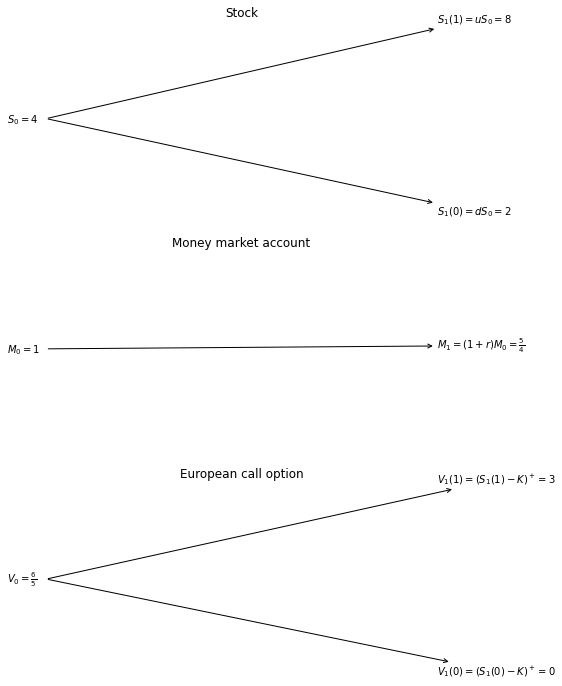

In [5]:
# the one-period binomial model defined by the parameters above
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7,12))

# Stock price path
ax[0].axis("off")
ax[0].set_title("Stock")
ax[0].annotate(text=r'$S_0=4$',
                  xy=(0, 0.5),
                  xytext=(-0.10, 0.48))
ax[0].annotate(text=r'$S_1(0)=dS_0=2$',
                  xy=(0, 0.5),
                  xytext=(1, 0),
                  arrowprops=dict(arrowstyle="<-"))
ax[0].annotate(text=r'$S_1(1)=uS_0=8$',
                  xy=(0, 0.5),
                  xytext=(1, 1),
                  arrowprops=dict(arrowstyle="<-"))

# Money market account price path
ax[1].axis("off")
ax[1].set_title("Money market account")
ax[1].annotate(text=r'$M_0=1$',
                  xy=(0, 0.5),
                  xytext=(-0.10, 0.48))
ax[1].annotate(text=r'$M_1=(1+r)M_0=\frac{5}{4}$',
                  xy=(0, 0.5),
                  xytext=(1, 0.5),
                  arrowprops=dict(arrowstyle="<-"))

# Derivative price path
ax[2].axis("off")
ax[2].set_title("European call option")
ax[2].annotate(text=r'$V_0=\frac{6}{5}$',
                  xy=(0, 0.5),
                  xytext=(-0.10, 0.48))
ax[2].annotate(text=r'$V_1(0)=(S_1(0)-K)^+=0$',
                  xy=(0, 0.5),
                  xytext=(1, 0),
                  arrowprops=dict(arrowstyle="<-"))
ax[2].annotate(text=r'$V_1(1)=(S_1(1)-K)^+=3$',
                  xy=(0, 0.5),
                  xytext=(1, 1),
                  arrowprops=dict(arrowstyle="<-"))

# A specific example - algorithm implementation

### Step 1 - encoding the risk-neutral probabilities, $\tilde{\mathbb{P}}$

The first step is to encode the risk-neutral probabilities into the amplitudes of the quantum computer.  Concretely, we want to perform
\begin{equation}
|0\rangle\rightarrow\sqrt{\tilde{\mathbb{P}}(\{0\})}|0\rangle+\sqrt{\tilde{\mathbb{P}}(\{1\})}|1\rangle.
\end{equation}

In our case, $\tilde{\mathbb{P}}(\{0\})=\tilde{\mathbb{P}}(\{1\})=\frac{1}{2}$, so that the above equation becomes
\begin{equation}
|0\rangle\rightarrow\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right).
\end{equation}

Note that this can be achieved with a single Hadamard gate, i.e.,
\begin{equation}
H|0\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right).
\end{equation}
Below we confirm this in simulation.

[0.71+0.j 0.71+0.j]


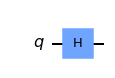

In [6]:
# Build the circuit
reg = QuantumRegister(1, name='q')
circ = QuantumCircuit(reg, name='P')
circ.h(reg[0])

# Simulate the circuit
simulator = Aer.get_backend('statevector_simulator')
result = execute(circ, simulator).result()
statevector = result.get_statevector(circ)
print(np.round(statevector, 2))
circ.draw(output="mpl")

### Step 2 - encoding the derivative payoff function, $f(.)$

In this next step we want to encode the payoff of the derivative security.  Concretely we want to perform
\begin{align}
|0\rangle|x\rangle\rightarrow\left(\sqrt{1-f(x)}|0\rangle+\sqrt{f(x)}|1\rangle\right)|x\rangle,
\end{align}
where $x\in\{0,1\}=\Omega$.

When $x=0$, the desired operation above becomes
\begin{align}
|0\rangle|0\rangle\rightarrow&\left(\sqrt{1-f(0)}|0\rangle+\sqrt{\underbrace{f(0)}_{=0}}|1\rangle\right)|0\rangle\\
=&|0\rangle|0\rangle.
\end{align}
When $x=1$, the desired operation above becomes
\begin{align}
|0\rangle|1\rangle\rightarrow&\left(\sqrt{1-f(1)}|0\rangle+\sqrt{\underbrace{f(1)}_{=1}}|1\rangle\right)|1\rangle\\
=&|1\rangle|1\rangle.
\end{align}

Note that this can be achieved with a single CNOT gate, i.e.,
\begin{align}
\text{CNOT}|0\rangle|0\rangle=|0\rangle|0\rangle,\\
\text{CNOT}|0\rangle|1\rangle=|1\rangle|1\rangle.
\end{align}
Below we confirm this in simulation.

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]->[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


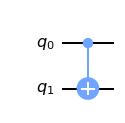

In [7]:
# Build the circuit
reg = QuantumRegister(2, name='q')
circ = QuantumCircuit(reg, name='f(0)')
# initialize register to |0>|x>
# when x=0, this is |0>|0>
circ.cx(reg[0], reg[1])

# Simulate the circuit
simulator = Aer.get_backend('statevector_simulator')
result = execute(circ, simulator).result()
statevector = result.get_statevector(circ)
print("[1.+0.j 0.+0.j 0.+0.j 0.+0.j]->{0}".format(statevector))
circ.draw(output="mpl")

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]->[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


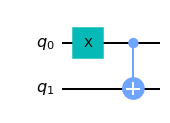

In [8]:
# Build and print the circuit
reg = QuantumRegister(2, name='q')
circ = QuantumCircuit(reg, name='f(1)')
# initialize register to |0>|x>
# when x=1, this is |0>|1>
circ.x(reg[0])
circ.cx(reg[0], reg[1])

# Simulate the circuit
# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')
# Execute and get counts
result = execute(circ, simulator).result()
statevector = result.get_statevector(circ)
print("[0.+0.j 1.+0.j 0.+0.j 0.+0.j]->{0}".format(statevector))
circ.draw(output="mpl")

### Defining the operation $L$

If we now perform both of these operations on a register initialized to $|0\rangle|0\rangle$, we end up with the state
\begin{gather}
|0\rangle|0\rangle\\
\rightarrow |0\rangle\left(\sqrt{\tilde{\mathbb{P}}(\{0\})}|0\rangle+\sqrt{\tilde{\mathbb{P}}(\{1\})}|1\rangle\right)\\
\rightarrow \left(\sqrt{1-f(0)}|0\rangle+\sqrt{f(0)}|1\rangle\right)\sqrt{\tilde{\mathbb{P}}(\{0\})}|0\rangle+\left(\sqrt{1-f(1)}|0\rangle+\sqrt{f(1)}|1\rangle\right)\sqrt{\tilde{\mathbb{P}}(\{1\})}|1\rangle\\
=:|u\rangle.
\end{gather}

We define the operation that performs this procedure $L$.  In other words,
\begin{equation}
L|0\rangle|0\rangle=|u\rangle.
\end{equation}

Plugging in $\tilde{\mathbb{P}}(\{0\})=\tilde{\mathbb{P}}(\{1\})=\frac{1}{2}$, $f(0)=0$, and $f(1)=1$ into the expression above we obtain
\begin{equation}
L|0\rangle|0\rangle=|u\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle).
\end{equation}
Below we confirm this in simulation.

[0.71+0.j 0.  +0.j 0.  +0.j 0.71+0.j]


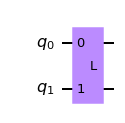

In [9]:
# Build the circuit
reg = QuantumRegister(2, name='q')
circ = QuantumCircuit(reg, name='L')
circ.h(reg[0])
circ.cx(reg[0], reg[1])

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
L = circ.to_gate()

# Build the circuit
reg = QuantumRegister(2, name='q')
circ = QuantumCircuit(reg, name='L')
circ.append(L, (reg[0], reg[1]))

# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')
result = execute(circ, simulator).result()
statevector = result.get_statevector(circ)
print(np.round(statevector,2))
circ.draw(output="mpl")

In [10]:
u = (1/np.sqrt(2))*np.array([1,0,0,1])
# We build P1 = |1><1|
a = np.array([0,1])
aT = np.transpose(a)
# P=|1><1| 
P1 = np.outer(aT,a)
# Op = I_2 \bigotimes |1><1|
Op = np.kron(P1, np.eye(2))
#u = np.transpose(ch_ket)
u = np.dot(u, np.dot(Op, u))
print("u = {0}".format(np.round(u,2)))
r = 1/4.
print("V_0 = {0}".format(1/(1+r)*3*u))

u = 0.5
V_0 = 1.2


### Step 3 - phase estimation

Finally we want to perform.
\begin{equation}
Q=R_{|u\rangle}R_{U|u\rangle}=LZL^{\dagger}ULZL^{\dagger}U^{\dagger}.
\end{equation}
We now build a circuit for each of the operators in the right-hand side of the above equation.  We already constructed the circuit for $L$ above, and so we proceed with $Z$.

### Circuit for $Z$

Recall that
\begin{equation}
Z=I\otimes I-2|00\rangle\langle00|=
\begin{pmatrix}
-1 & 0 & 0 & 0\\
0  & 1 & 0 & 0\\
0  & 0 & 1 & 0\\
0  & 0 & 0 & 1
\end{pmatrix}.
\end{equation}
In terms of native operations, this can be rewritten as
\begin{equation}
\begin{pmatrix}
0 & 0 & 0 & 1\\
0  & 0 & 1 & 0\\
0  & 1 & 0 & 0\\
1  & 0 & 0 & 0
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0  & 0\\
0  & 1 & 0 & 0\\
0  & 0 & 1 & 0\\
0  & 0 & 0 & -1
\end{pmatrix}
\begin{pmatrix}
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
1 & 0 & 0 & 0
\end{pmatrix}=(X\otimes X)(CZ)(X\otimes X).
\end{equation}

In [11]:
# Z = I\otimes I-2|00><00|
# Equivalently,
'''Z = np.array([[-1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 1, 0],
                 [0, 0, 0 ,1]])'''
reg = QuantumRegister(2)
circ = QuantumCircuit(reg, name='Z')
circ.x(reg[0])
circ.x(reg[1])
circ.cz(reg[0], reg[1])
circ.x(reg[0])
circ.x(reg[1])
# Convert to a gate and stick it into an arbitrary place in the bigger circuit
Z = circ.to_gate()
print(circ)

# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
statevector = result.get_statevector(circ)
print(statevector)

       ┌───┐   ┌───┐
q27_0: ┤ X ├─■─┤ X ├
       ├───┤ │ ├───┤
q27_1: ┤ X ├─■─┤ X ├
       └───┘   └───┘
[-1.+0.j  0.+0.j  0.+0.j  0.+0.j]


### Circuit for $L^\dagger$

Recall that $L=CX(I\otimes H)$, and so we have
\begin{equation}
L^{\dagger}=(CX(I\otimes H))^{\dagger}=(I\otimes H)^{\dagger}CX^{\dagger}=(I\otimes H)CX.
\end{equation}

In [12]:
# L adjoint
# Build a sub-circuit
reg = QuantumRegister(2)
circ = QuantumCircuit(reg, name='L_adj')
circ.cx(reg[0], reg[1])
circ.h(reg[0])

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
Ladj = circ.to_gate()
print(circ)

            ┌───┐
q36_0: ──■──┤ H ├
       ┌─┴─┐└───┘
q36_1: ┤ X ├─────
       └───┘     


### Circuit for $U=U^{\dagger}$

We now design the circuit that implements $U=U^{\dagger}$.  This is simply given by
\begin{equation}
U=U^{\dagger}=I\otimes I -2|1\rangle\langle 1|\otimes I=
\begin{pmatrix}
1 & 0 &  0 &  0\\
0 & 1 &  0 &  0\\
0 & 0 & -1 &  0\\
0 & 0 &  0 & -1
\end{pmatrix}
=Z\otimes I.
\end{equation}

In [13]:
# U = I\otimes I - 2|1><1|\otimes I
# Equivalently,
'''U = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, -1, 0],
                 [0, 0, 0, -1]])'''
reg = QuantumRegister(2)
circ = QuantumCircuit(reg, name='U')
circ.z(reg[1])
print(circ)
# Convert to a gate and stick it into an arbitrary place in the bigger circuit
U = circ.to_gate()

# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
statevector = result.get_statevector(circ)
print(statevector)

            
q37_0: ─────
       ┌───┐
q37_1: ┤ Z ├
       └───┘
[ 1.+0.j  0.+0.j -0.+0.j -0.+0.j]


### Circuit for $Q$

     ┌────┐┌────────┐┌────┐┌────┐┌────┐┌────────┐┌────┐┌────┐
q_0: ┤0   ├┤0       ├┤0   ├┤0   ├┤0   ├┤0       ├┤0   ├┤0   ├
     │  U ││  L_adj ││  Z ││  L ││  U ││  L_adj ││  Z ││  L │
q_1: ┤1   ├┤1       ├┤1   ├┤1   ├┤1   ├┤1       ├┤1   ├┤1   ├
     └────┘└────────┘└────┘└────┘└────┘└────────┘└────┘└────┘
[-1.-0.j  0.+0.j  0.+0.j -0.-0.j]
     ┌────┐
q_0: ┤0   ├
     │  Q │
q_1: ┤1   ├
     └────┘


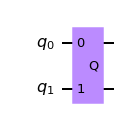

In [14]:
'''Q= np.array([[-1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 1, 0],
                 [0, 0, 0, -1]])'''
# Build a sub-circuit
reg = QuantumRegister(size=2, name='q')
circ = QuantumCircuit(reg, name='Q')
circ.append(U, [reg[0], reg[1]])
circ.append(Ladj, [reg[0], reg[1]])
circ.append(Z, [reg[0], reg[1]])
circ.append(L, [reg[0], reg[1]])
circ.append(U, [reg[0], reg[1]])
circ.append(Ladj, [reg[0], reg[1]])
circ.append(Z, [reg[0], reg[1]])
circ.append(L, [reg[0], reg[1]])
print(circ)
# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
#print(result)
statevector = result.get_statevector(circ)
print(np.round(statevector,2))


# Convert to a gate and stick it into an arbitrary place in the bigger circuit
Q = circ.to_gate()
reg = QuantumRegister(2, name='q')
circ = QuantumCircuit(reg, name='Q')
circ.append(Q, [reg[0], reg[1]])
print(circ)
circ.draw(output='mpl')

[-1.-0.j  0.+0.j  0.+0.j -0.-0.j]


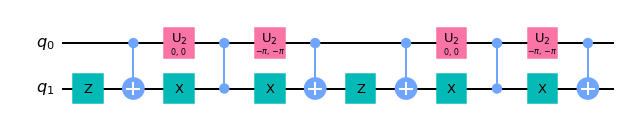

In [15]:
# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
#print(result)
statevector = result.get_statevector(circ)
print(np.round(statevector,2))

circ = transpile(circ, simulator)
circ.draw('mpl')

Note that $Q$ can also be implemented with the following, much shorter circuit.

     ┌───┐┌───┐┌───┐
q_0: ┤ X ├┤ Z ├┤ X ├
     ├───┤└───┘└───┘
q_1: ┤ Z ├──────────
     └───┘          
[-1.+0.j  0.+0.j  0.-0.j -0.+0.j]
     ┌────┐
q_0: ┤0   ├
     │  Q │
q_1: ┤1   ├
     └────┘


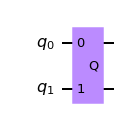

In [16]:
# Build a sub-circuit

reg = QuantumRegister(2, name='q')
circ = QuantumCircuit(reg, name='Q')
# prepare state
#circ.x(reg[0])
#circ.x(reg[1])
#circ.barrier()
circ.x(reg[0])
circ.z(reg[0])
circ.x(reg[0])
circ.z(reg[1])
print(circ)

# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
#print(result)
statevector = result.get_statevector(circ)
print(np.round(statevector,2))

circ.draw('mpl')

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
Q = circ.to_gate()
reg = QuantumRegister(2, name='q')
circ = QuantumCircuit(reg, name='Q')
circ.append(Q, [reg[0], reg[1]])
print(circ)
circ.draw(output='mpl')

### Circuit for $cQ$

In [30]:
reg = QuantumRegister(3)
circ = QuantumCircuit(reg, name='Q')
cQ = Q.control(1)
circ.append(cQ, [reg[2], reg[0], reg[1]])
circ.draw()
# Let's keep track of the controlled-Qs
cQs = {}
cQs[2**0] = cQ

reg = QuantumRegister(3)
circ = QuantumCircuit(reg, name='cQ')
circ.append(cQ, [reg[2], reg[0], reg[1]])
print(circ)


'''circ = transpile(circ, simulator)
print(circ)

# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
#print(result)
statevector = result.get_statevector(circ)
print(statevector)'''

        ┌────┐
q307_0: ┤0   ├
        │  Q │
q307_1: ┤1   ├
        └─┬──┘
q307_2: ──■───
              


"circ = transpile(circ, simulator)\nprint(circ)\n\n# Select the StatevectorSimulator from the Aer provider\nsimulator = Aer.get_backend('statevector_simulator')\n\n# Execute and get counts\nresult = execute(circ, simulator).result()\n#print(result)\nstatevector = result.get_statevector(circ)\nprint(statevector)"

### Circuits $cQ^{2^n}$, $n\geq 1$

In [31]:
#cQs = {2**0: cQ, 2**1: cQ2, 2**2: cQ4, 2**3: cQ8}
n_b = 3
for i in range(1,n_b):
    reg = QuantumRegister(2)
    circ = QuantumCircuit(reg, name='Q{0}'.format(int(2**i)))
    for _ in range(2**i):
        circ.append(Q, [reg[0], reg[1]])
    Q2i = circ.to_gate()
    cQ2i = Q2i.control(1)
    cQs[2**i] = cQ2i
    reg = QuantumRegister(3)
    circ = QuantumCircuit(reg, name='cQ{0}'.format(int(2**i)))
    circ.append(cQ2i, [reg[2], reg[0], reg[1]])
    print(circ)

        ┌─────┐
q309_0: ┤0    ├
        │  Q2 │
q309_1: ┤1    ├
        └──┬──┘
q309_2: ───■───
               
        ┌─────┐
q311_0: ┤0    ├
        │  Q4 │
q311_1: ┤1    ├
        └──┬──┘
q311_2: ───■───
               


### Circuit for QFT$^{-1}$

Recall from the figure immediately before Equation (25) that we also need to implement an inverse quantum fourier transform.  Qiskit has very useful pre-built tools that can do this for us.

In [32]:
from qiskit.circuit.library import QFT

In [33]:
reg = QuantumRegister(2)
circ =  QuantumCircuit(reg, name='test')
circ.append(QFT(num_qubits=2, inverse=True), [reg[i] for i in range(2)])
print(circ)
# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')
# Execute and get counts
result = execute(circ, simulator).result()
#print(result)
statevector = result.get_statevector(circ)
print(statevector)

        ┌───────┐
q312_0: ┤0      ├
        │  IQFT │
q312_1: ┤1      ├
        └───────┘
[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


# Full circuit

Now it's time to run the entire circuit and see what we get.  Recall that $Q$ is given by
\begin{equation}
Q = \begin{pmatrix}
-1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}.
\end{equation}
Recall that $L$ prepares the state $\frac{1}{2}(|00\rangle+|11\rangle)$, where $|00\rangle$ is an eigenvector of $Q$ with eigenvalue $-1=e^{2\pi i (1/2)}$, and $|11\rangle$ is also an eigenvector of $Q$ with eigenvalue $-1=e^{2\pi i (1/2)}$.  Hence, following the discussion from the section PEA 3, we expect that the measurements from the circuit should return a binary expansion of $1/2$, in other words, $10\dots0$, where this $n_b$-bit string contains $n_b-1$ zeros.  We confirm this in the simulation below.

In [34]:
from qiskit import ClassicalRegister
from qiskit.providers.aer import QasmSimulator

In [35]:
# n_w = |\Omega|
n_w = 2**0
# precision with which we wish to estimate E[v(A)]
n_b = n_b
# total number of qubits required
n = n_w + 1 + n_b

# Below we construct the circuit with a n_b-bit approximation
reg = QuantumRegister(n)
c = ClassicalRegister(n_b)
circ = QuantumCircuit(reg, c, name='Derivative pricing')

# Apply F
circ.append(L, [reg[0], reg[1]])

# Hadamards
for _ in range(n_w+1, n):
    circ.h(reg[_])
    
# Controlled Qs
for _ in range(n_b):
    circ.append(cQs[2**_], [reg[n_w+1+_], reg[0], reg[1]])
    
# Inverse QFT
circ.append(QFT(num_qubits=n_b, inverse=True), [reg[i] for i in range(n_w+1,n)])

# Measure
for _ in range(n_w+1, n):
    circ.measure(reg[_], c[_-n_w-1])

print(circ)


# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')
# Execute and get counts
result = execute(circ, simulator).result()
#print(result)
statevector = result.get_statevector(circ)
#print(statevector)

simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)
#print(circ)
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)

        ┌────┐┌────┐┌─────┐┌─────┐                  
q324_0: ┤0   ├┤0   ├┤0    ├┤0    ├──────────────────
        │  L ││  Q ││  Q2 ││  Q4 │                  
q324_1: ┤1   ├┤1   ├┤1    ├┤1    ├──────────────────
        ├───┬┘└─┬──┘└──┬──┘└──┬──┘┌───────┐┌─┐      
q324_2: ┤ H ├───■──────┼──────┼───┤0      ├┤M├──────
        ├───┤          │      │   │       │└╥┘┌─┐   
q324_3: ┤ H ├──────────■──────┼───┤1 IQFT ├─╫─┤M├───
        ├───┤                 │   │       │ ║ └╥┘┌─┐
q324_4: ┤ H ├─────────────────■───┤2      ├─╫──╫─┤M├
        └───┘                     └───────┘ ║  ║ └╥┘
  c3: 3/════════════════════════════════════╩══╩══╩═
                                            0  1  2 
{'100': 1024}


The $\texttt{counts}$ variable above should be a dictionary with only one key, that key being the bit string $10\dots 0$.

# References

[1] Black, Fischer, and Myron Scholes. "The pricing of options and corporate liabilities." World Scientific Reference on Contingent Claims Analysis in Corporate Finance: Volume 1: Foundations of CCA and Equity Valuation. 2019. 3-21.

[2] Merton, Robert C. "Theory of rational option pricing." The Bell Journal of economics and management science (1973): 141-183.

[3] Sarpe, William F. "Investments. Englewood Cliffs". NJ: Prentice Hall. (1978).

[4] Cox, John C., Stephen A. Ross, and Mark Rubinstein. "Option pricing: A simplified approach." Journal of financial Economics 7.3 (1979): 229-263.

[5] Shreve, Steven. Stochastic calculus for finance I: the binomial asset pricing model. Springer Science & Business Media, 2005.

[6] Shreve, Steven E. Stochastic calculus for finance II: Continuous-time models. Vol. 11. Springer Science & Business Media, 2004.

[7] Montanaro, Ashley. "Quantum speedup of Monte Carlo methods." Proceedings of the Royal Society A: Mathematical, Physical and Engineering Sciences 471.2181 (2015): 20150301.

[8] Rebentrost, Patrick, Brajesh Gupt, and Thomas R. Bromley. "Quantum computational finance: Monte Carlo pricing of financial derivatives." Physical Review A 98.2 (2018): 022321.

[9] Xu, Guanglei, et al. "Turbulent mixing simulation via a quantum algorithm." AIAA Journal 56.2 (2018): 687-699.

[10] Nielsen, Michael A., and Isaac Chuang. "Quantum computation and quantum information." (2002): 558-559.